## Lab: Answer and Reflection Module with OpenAI Chat API

### Objective

By the end of this lab, you will:

1. Implement a basic Q\&A function that prompts the OpenAI Chat API using a step-by-step chain-of-thought system message.
2. Extend the module with a reflection step that analyzes the initial answer and improves the original question.
3. Compare the original and improved questions and observe how refinement affects answer quality.



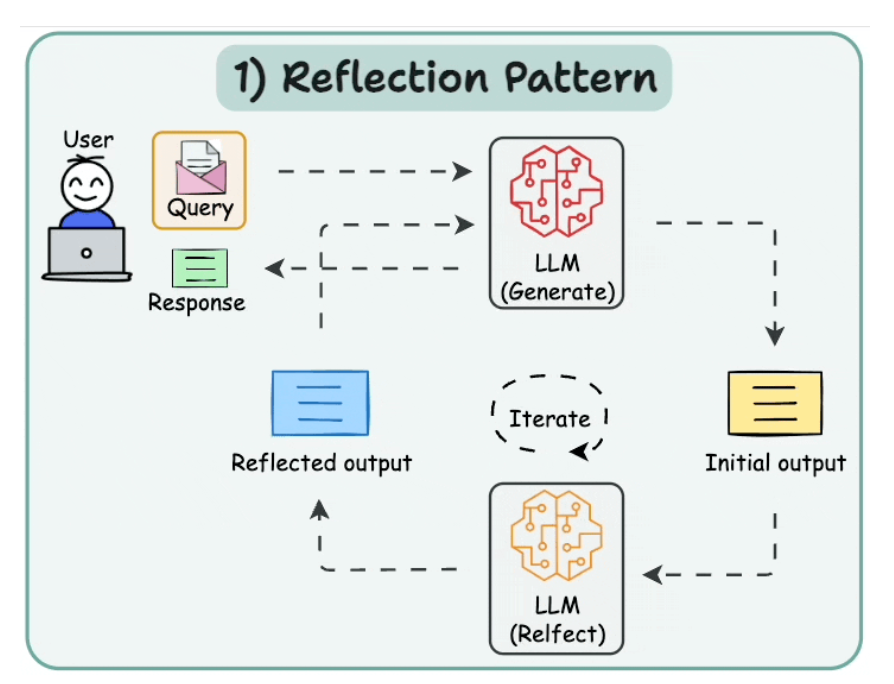

In [1]:
import os
from openai import OpenAI
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

True

In [2]:
import os
from openai import OpenAI

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
model_name =  "gpt-4o"   


In [3]:
# Cell 2: Define the LLM Generator Function
# This function acts as the "answer agent". It takes a list of messages and generates a response using the LLM.
# The messages should include a system prompt like: "You are a helpful assistant that thinks step by step."
# It can also include previous conversations or feedback for improvement.

def llm_generator(messages):
    """
    Generate a response from the LLM based on the input messages.
    
    Args:
    messages (list): List of message dictionaries, e.g., [{"role": "system", "content": "..."}, {"role": "user", "content": "..."}]
    
    Returns:
    str: The generated response content.
    """
    response = client.chat.completions.create(
        model=model_name,
        messages=messages,
        temperature=0.1,  # Adjust temperature for creativity

    )
    return response.choices[0].message.content

In [ ]:

def reflect_agent(answer):
    """
    Analyze the given answer using the reflective prompt and return the feedback.
    
    Args:
    answer (str): The answer to reflect on.
    
    Returns:
    str: The reflection feedback as a string.
    """
    reflect_prompt = (
        f"คุณเป็นผู้เชี่ยวชาญในการประเมินคำตอบ กรุณาวิเคราะห์คำตอบต่อไปนี้ in thai:\n"
        f"- 'completeness': ประเมินความครบถ้วนของคำตอบ (คะแนน 1-10)\n"
        f"- 'accuracy': ประเมินความถูกต้องของคำตอบ (คะแนน 1-10)\n"
        f"- 'clarity': ประเมินความชัดเจนของคำตอบ (คะแนน 1-10)\n"
        f"- 'strengths': จุดแข็งของคำตอบ\n"
        f"- 'weaknesses': จุดอย่อนของคำตอบ\n"
        f"- 'missing_aspects': สิ่งที่ขาดหายไปในคำตอบ\n"
        f"- 'improvement_suggestions': ข้อเสนอแนะเพื่อปรับปรุงคำตอบ\n\n"
        f"คำตอบ: {answer}\n"
    )
    
    # Messages for the reflect function
    messages = [
        {"role": "system", "content": reflect_prompt}
    ]
    
    # Call the LLM to generate the reflection (using the same generator function for simplicity)
    feedback = llm_generator(messages)
    return feedback

In [19]:
questions = [
    "ท่านจะออกแบบและตรวจสอบความถูกต้องของระบบ AI ที่สามารถทบทวนและปรับปรุงตัวเอง (self-reflecting) สำหรับการทำเกษตรแม่นยำสูงในพื้นที่ระเบียงเศรษฐกิจพิเศษภาคตะวันออก (EEC) ของไทยได้อย่างไร โดยมีเป้าหมายเพื่อเพิ่มผลผลิตทุเรียนให้สูงสุด พร้อมกับลดการใช้น้ำและผลกระทบต่อสิ่งแวดล้อมให้เหลือน้อยที่สุด โดยต้องคำนึงถึงแบบจำลองการเปลี่ยนแปลงสภาพภูมิอากาศที่ผันผวนด้วย?",
    "โปรดเสนอโครงร่างที่ครอบคลุมสำหรับทดสอบความเป็นธรรม, ความทนทาน (robustness), และความสามารถในการอธิบายผล (interpretability) ของเครื่องมือวินิจฉัยโรคโดยใช้ AI สำหรับไข้เลือดออกสายพันธุ์ต่างๆ ในเครือข่ายโรงพยาบาลรัฐของไทย โดยจะมั่นใจได้อย่างไรว่าระบบไม่มีอคติต่อกลุ่มประชากรในภูมิภาคหรือสถานะทางเศรษฐกิจและสังคมที่เฉพาะเจาะจง?",
    "ท่านจะพัฒนาและทดสอบระบบแนะนำการท่องเที่ยวเฉพาะบุคคลสำหรับกรุงเทพมหานครที่ขับเคลื่อนด้วย AI อย่างต่อเนื่องได้อย่างไร ให้ระบบสามารถปรับตัวแบบเรียลไทม์ตามความหนาแน่นของการจราจร, กิจกรรมในท้องถิ่น, และการเปลี่ยนแปลงของความรู้สึกผู้ใช้งาน (user sentiment) พร้อมกับส่งเสริมการท่องเที่ยวที่ยั่งยืนและสนับสนุนธุรกิจท้องถิ่นนอกเหนือจากแหล่งท่องเที่ยวกระแสหลัก?",
    "จงร่างกลยุทธ์การตรวจสอบความปลอดภัยและการทดสอบแบบปรปักษ์ (adversarial testing) สำหรับแบบจำลองการให้คะแนนสินเชื่อ (credit scoring) ที่ใช้ AI สำหรับประชากรกลุ่มที่ไม่มีบัญชีธนาคาร (unbanked) ในประเทศไทย ซึ่งต้องอาศัยข้อมูลทางเลือกเป็นหลัก (เช่น ข้อมูลการใช้โทรศัพท์มือถือ, ธุรกรรมโซเชียลคอมเมิร์ซ) โดยกลยุทธ์ดังกล่าวต้องจัดการกับข้อกังวลด้านความเป็นส่วนตัวของข้อมูลภายใต้ พ.ร.บ. คุ้มครองข้อมูลส่วนบุคคล (PDPA) ด้วย",
    "คุณจะออกแบบระเบียบการทดสอบสำหรับแบบจำลองภาษาขนาดใหญ่ (LLM) ที่ได้รับการปรับจูนสำหรับภาษาถิ่นอีสานอย่างไร เพื่อให้มั่นใจในความน่าเชื่อถือและความเหมาะสมทางวัฒนธรรมสำหรับการใช้งานในแชทบอทบริการสาธารณะของรัฐบาล โดยให้ครอบคลุมการทดสอบการจัดการกับสำนวนทางวัฒนธรรมที่ละเอียดอ่อนและการหลีกเลี่ยงการสร้างเนื้อหาที่ไม่เหมาะสม?",
    "ท่านจะออกแบบและทดสอบ AI ที่สามารถปรับเปลี่ยนตัวเองเพื่อบริหารจัดการห่วงโซ่อุปทานเวชภัณฑ์แห่งชาติในสถานการณ์อุทกภัยครั้งใหญ่ได้อย่างไร โดยระบบต้องสามารถปรับเส้นทางโลจิสติกส์แบบเรียลไทม์ คาดการณ์การขาดแคลนในโรงพยาบาลภูมิภาค และจัดสรรทรัพยากรอย่างเป็นธรรมโดยอิงจากข้อมูลที่เปลี่ยนแปลงตลอดเวลาจากหน่วยงานฉุกเฉินและอาสาสมัคร?",
    "จงนำเสนอแผนการตรวจสอบความถูกต้องของ AI ที่เรียนรู้ด้วยตนเองเพื่อควบคุมโครงข่ายไฟฟ้าของประเทศ ซึ่งต้องสร้างสมดุลระหว่างพลังงานหมุนเวียนที่ผันผวนกับความต้องการใช้ไฟฟ้าแบบเรียลไทม์ ทั้งยังต้องคาดการณ์ความเสี่ยงไฟฟ้าดับจากสภาพอากาศรุนแรง และปรับกลยุทธ์การซื้อขายพลังงานกับประเทศเพื่อนบ้านให้เหมาะสมที่สุดเพื่อรักษาเสถียรภาพของกริดในต้นทุนที่ต่ำที่สุดได้อย่างไร?",
    "ท่านจะสร้างระเบียบวิธีทดสอบและกลไกการแก้ไขข้อผิดพลาดด้วยตนเองสำหรับฝูงโดรนส่งของอัตโนมัติที่ต้องทำงานในย่านธุรกิจใจกลางกรุงเทพฯ ที่มีสภาพแวดล้อมซับซ้อนและคาดเดายากได้อย่างไร โดยต้องมั่นใจในความปลอดภัยจากการหลบหลีกสิ่งกีดขวางที่ไม่ตายตัว (เช่น หาบเร่, สายไฟ, มอเตอร์ไซค์รับจ้าง) และการปรับตัวต่อสภาพอากาศที่เปลี่ยนแปลงกะทันหัน?"
]
# %%
question = questions[-1]  # Example question

print(f"Question: {question}")


Question: ท่านจะสร้างระเบียบวิธีทดสอบและกลไกการแก้ไขข้อผิดพลาดด้วยตนเองสำหรับฝูงโดรนส่งของอัตโนมัติที่ต้องทำงานในย่านธุรกิจใจกลางกรุงเทพฯ ที่มีสภาพแวดล้อมซับซ้อนและคาดเดายากได้อย่างไร โดยต้องมั่นใจในความปลอดภัยจากการหลบหลีกสิ่งกีดขวางที่ไม่ตายตัว (เช่น หาบเร่, สายไฟ, มอเตอร์ไซค์รับจ้าง) และการปรับตัวต่อสภาพอากาศที่เปลี่ยนแปลงกะทันหัน?


In [20]:
# Initial system prompt for the generator
system_prompt = "You are a helpful assistant"

# Initial messages for the first generation
messages = [
  {"role": "system", "content": system_prompt},
  {"role": "user", "content": question}]

answer = llm_generator(messages)

print(f"Question: {question}")
print(50 * "=")
print(f"Answer: {answer}")

Question: ท่านจะสร้างระเบียบวิธีทดสอบและกลไกการแก้ไขข้อผิดพลาดด้วยตนเองสำหรับฝูงโดรนส่งของอัตโนมัติที่ต้องทำงานในย่านธุรกิจใจกลางกรุงเทพฯ ที่มีสภาพแวดล้อมซับซ้อนและคาดเดายากได้อย่างไร โดยต้องมั่นใจในความปลอดภัยจากการหลบหลีกสิ่งกีดขวางที่ไม่ตายตัว (เช่น หาบเร่, สายไฟ, มอเตอร์ไซค์รับจ้าง) และการปรับตัวต่อสภาพอากาศที่เปลี่ยนแปลงกะทันหัน?
Answer: การสร้างระเบียบวิธีทดสอบและกลไกการแก้ไขข้อผิดพลาดสำหรับฝูงโดรนส่งของอัตโนมัติในย่านธุรกิจใจกลางกรุงเทพฯ ที่มีสภาพแวดล้อมซับซ้อนและคาดเดายาก จำเป็นต้องคำนึงถึงหลายปัจจัยเพื่อให้มั่นใจในความปลอดภัยและประสิทธิภาพของระบบ ดังนี้:

1. **การสร้างแบบจำลองสภาพแวดล้อม**:
   - ใช้ข้อมูลแผนที่ 3 มิติที่ละเอียดและข้อมูลจากเซ็นเซอร์เพื่อสร้างแบบจำลองสภาพแวดล้อมที่สมจริง
   - อัปเดตข้อมูลแบบเรียลไทม์จากแหล่งข้อมูลต่าง ๆ เช่น กล้องวงจรปิด, ข้อมูลจราจร, และข้อมูลสภาพอากาศ

2. **การทดสอบในสภาพแวดล้อมจำลอง (Simulation Testing)**:
   - ใช้การจำลองสถานการณ์ต่าง ๆ ที่อาจเกิดขึ้น เช่น การปรากฏของสิ่งกีดขวางที่ไม่คาดคิด, การเปลี่ยนแปลงของสภาพอากาศ
   - ทดสอบการหลบหลีกสิ่

In [21]:
feedback = reflect_agent(answer)

print("reflect_agent feedback:")
print(feedback)

reflect_agent feedback:
- 'completeness': 9
- 'accuracy': 9
- 'clarity': 8
- 'strengths': คำตอบมีความครบถ้วนและครอบคลุมหลายด้านที่สำคัญในการพัฒนาระบบโดรนส่งของในสภาพแวดล้อมที่ซับซ้อน มีการระบุขั้นตอนและเทคโนโลยีที่เกี่ยวข้องอย่างชัดเจน เช่น การสร้างแบบจำลองสภาพแวดล้อม, การทดสอบในสภาพแวดล้อมจำลองและภาคสนาม, การพัฒนากลไกการหลบหลีกสิ่งกีดขวาง, และการจัดการสภาพอากาศ
- 'weaknesses': คำตอบอาจขาดความชัดเจนในบางส่วน เช่น การอธิบายรายละเอียดของเทคโนโลยีหรืออัลกอริทึมที่ใช้ในการพัฒนาระบบ นอกจากนี้ การใช้ภาษาบางส่วนอาจทำให้ผู้อ่านที่ไม่คุ้นเคยกับเทคโนโลยีเข้าใจยาก
- 'missing_aspects': คำตอบไม่ได้กล่าวถึงการประเมินความเสี่ยงและการจัดการความเสี่ยงที่อาจเกิดขึ้นจากการใช้โดรนในพื้นที่ที่มีประชากรหนาแน่น รวมถึงการพิจารณาด้านกฎหมายและข้อบังคับที่เกี่ยวข้องกับการใช้โดรนในพื้นที่เมือง
- 'improvement_suggestions': ควรเพิ่มรายละเอียดเกี่ยวกับเทคโนโลยีและอัลกอริทึมที่ใช้ในการพัฒนาระบบ เช่น การอธิบายวิธีการทำงานของอัลกอริทึมการเรียนรู้ของเครื่อง นอกจากนี้ ควรเพิ่มข้อมูลเกี่ยวกับการประเมินและจัดการความเสี่ยง 

In [23]:
improvement_prompt = (
            f"คุณเป็นผู้เชี่ยวชาญในการปรับปรุงคำตอบที่ให้มา กรุณาปรับปรุงคำตอบต่อไปนี้ตาม feedback ที่ได้รับ:\n\n"
            f"คำถาม: {question}\n\n"
            f"นี่คือคำตอบก่อนหน้าของคุณ: {answer}\n\n"
            f"นี่คือ feedback จากการประเมิน: {feedback}\n\n"
            f"โปรดปรับปรุงคำตอบของคุณให้ดีขึ้นตาม feedback นี้ โดยคิดทีละขั้นตอน."
        )

print(improvement_prompt)

คุณเป็นผู้เชี่ยวชาญในการปรับปรุงคำตอบที่ให้มา กรุณาปรับปรุงคำตอบต่อไปนี้ตาม feedback ที่ได้รับ:

คำถาม: ท่านจะสร้างระเบียบวิธีทดสอบและกลไกการแก้ไขข้อผิดพลาดด้วยตนเองสำหรับฝูงโดรนส่งของอัตโนมัติที่ต้องทำงานในย่านธุรกิจใจกลางกรุงเทพฯ ที่มีสภาพแวดล้อมซับซ้อนและคาดเดายากได้อย่างไร โดยต้องมั่นใจในความปลอดภัยจากการหลบหลีกสิ่งกีดขวางที่ไม่ตายตัว (เช่น หาบเร่, สายไฟ, มอเตอร์ไซค์รับจ้าง) และการปรับตัวต่อสภาพอากาศที่เปลี่ยนแปลงกะทันหัน?

นี่คือคำตอบก่อนหน้าของคุณ: การสร้างระเบียบวิธีทดสอบและกลไกการแก้ไขข้อผิดพลาดสำหรับฝูงโดรนส่งของอัตโนมัติในย่านธุรกิจใจกลางกรุงเทพฯ ที่มีสภาพแวดล้อมซับซ้อนและคาดเดายาก จำเป็นต้องคำนึงถึงหลายปัจจัยเพื่อให้มั่นใจในความปลอดภัยและประสิทธิภาพของระบบ ดังนี้:

1. **การสร้างแบบจำลองสภาพแวดล้อม**:
   - ใช้ข้อมูลแผนที่ 3 มิติที่ละเอียดและข้อมูลจากเซ็นเซอร์เพื่อสร้างแบบจำลองสภาพแวดล้อมที่สมจริง
   - อัปเดตข้อมูลแบบเรียลไทม์จากแหล่งข้อมูลต่าง ๆ เช่น กล้องวงจรปิด, ข้อมูลจราจร, และข้อมูลสภาพอากาศ

2. **การทดสอบในสภาพแวดล้อมจำลอง (Simulation Testing)**:
   - ใช้การจำลองสถานการณ

In [24]:
system_prompt = "You are a helpful assistant"


# Initial messages for the first generation
messages = [
  {"role": "system", "content": system_prompt},
  {"role": "user", "content": improvement_prompt}]


answer = llm_generator(messages)


print("question:", question)
print(50 * "=")
print(f"Improved Answer: {answer}")
        

question: ท่านจะสร้างระเบียบวิธีทดสอบและกลไกการแก้ไขข้อผิดพลาดด้วยตนเองสำหรับฝูงโดรนส่งของอัตโนมัติที่ต้องทำงานในย่านธุรกิจใจกลางกรุงเทพฯ ที่มีสภาพแวดล้อมซับซ้อนและคาดเดายากได้อย่างไร โดยต้องมั่นใจในความปลอดภัยจากการหลบหลีกสิ่งกีดขวางที่ไม่ตายตัว (เช่น หาบเร่, สายไฟ, มอเตอร์ไซค์รับจ้าง) และการปรับตัวต่อสภาพอากาศที่เปลี่ยนแปลงกะทันหัน?
Improved Answer: เพื่อปรับปรุงคำตอบให้ดียิ่งขึ้นตาม feedback ที่ได้รับ เราจะเพิ่มรายละเอียดเกี่ยวกับเทคโนโลยีและอัลกอริทึมที่ใช้ รวมถึงการประเมินและจัดการความเสี่ยง และการปฏิบัติตามกฎหมายและข้อบังคับที่เกี่ยวข้อง ดังนี้:

1. **การสร้างแบบจำลองสภาพแวดล้อม**:
   - ใช้ข้อมูลแผนที่ 3 มิติที่ละเอียดและข้อมูลจากเซ็นเซอร์ เช่น LIDAR และกล้อง เพื่อสร้างแบบจำลองสภาพแวดล้อมที่สมจริง
   - อัปเดตข้อมูลแบบเรียลไทม์จากแหล่งข้อมูลต่าง ๆ เช่น กล้องวงจรปิด, ข้อมูลจราจร, และข้อมูลสภาพอากาศ เพื่อให้โดรนสามารถปรับตัวต่อการเปลี่ยนแปลงได้ทันที

2. **การทดสอบในสภาพแวดล้อมจำลอง (Simulation Testing)**:
   - ใช้ซอฟต์แวร์จำลองที่สามารถสร้างสถานการณ์ต่าง ๆ เช่น การปรากฏของสิ่งกีดขวา

In [25]:
questions = [
    "ท่านจะออกแบบและตรวจสอบความถูกต้องของระบบ AI ที่สามารถทบทวนและปรับปรุงตัวเอง (self-reflecting) สำหรับการทำเกษตรแม่นยำสูงในพื้นที่ระเบียงเศรษฐกิจพิเศษภาคตะวันออก (EEC) ของไทยได้อย่างไร โดยมีเป้าหมายเพื่อเพิ่มผลผลิตทุเรียนให้สูงสุด พร้อมกับลดการใช้น้ำและผลกระทบต่อสิ่งแวดล้อมให้เหลือน้อยที่สุด โดยต้องคำนึงถึงแบบจำลองการเปลี่ยนแปลงสภาพภูมิอากาศที่ผันผวนด้วย?",
    "โปรดเสนอโครงร่างที่ครอบคลุมสำหรับทดสอบความเป็นธรรม, ความทนทาน (robustness), และความสามารถในการอธิบายผล (interpretability) ของเครื่องมือวินิจฉัยโรคโดยใช้ AI สำหรับไข้เลือดออกสายพันธุ์ต่างๆ ในเครือข่ายโรงพยาบาลรัฐของไทย โดยจะมั่นใจได้อย่างไรว่าระบบไม่มีอคติต่อกลุ่มประชากรในภูมิภาคหรือสถานะทางเศรษฐกิจและสังคมที่เฉพาะเจาะจง?",
    "ท่านจะพัฒนาและทดสอบระบบแนะนำการท่องเที่ยวเฉพาะบุคคลสำหรับกรุงเทพมหานครที่ขับเคลื่อนด้วย AI อย่างต่อเนื่องได้อย่างไร ให้ระบบสามารถปรับตัวแบบเรียลไทม์ตามความหนาแน่นของการจราจร, กิจกรรมในท้องถิ่น, และการเปลี่ยนแปลงของความรู้สึกผู้ใช้งาน (user sentiment) พร้อมกับส่งเสริมการท่องเที่ยวที่ยั่งยืนและสนับสนุนธุรกิจท้องถิ่นนอกเหนือจากแหล่งท่องเที่ยวกระแสหลัก?",
    "จงร่างกลยุทธ์การตรวจสอบความปลอดภัยและการทดสอบแบบปรปักษ์ (adversarial testing) สำหรับแบบจำลองการให้คะแนนสินเชื่อ (credit scoring) ที่ใช้ AI สำหรับประชากรกลุ่มที่ไม่มีบัญชีธนาคาร (unbanked) ในประเทศไทย ซึ่งต้องอาศัยข้อมูลทางเลือกเป็นหลัก (เช่น ข้อมูลการใช้โทรศัพท์มือถือ, ธุรกรรมโซเชียลคอมเมิร์ซ) โดยกลยุทธ์ดังกล่าวต้องจัดการกับข้อกังวลด้านความเป็นส่วนตัวของข้อมูลภายใต้ พ.ร.บ. คุ้มครองข้อมูลส่วนบุคคล (PDPA) ด้วย",
    "คุณจะออกแบบระเบียบการทดสอบสำหรับแบบจำลองภาษาขนาดใหญ่ (LLM) ที่ได้รับการปรับจูนสำหรับภาษาถิ่นอีสานอย่างไร เพื่อให้มั่นใจในความน่าเชื่อถือและความเหมาะสมทางวัฒนธรรมสำหรับการใช้งานในแชทบอทบริการสาธารณะของรัฐบาล โดยให้ครอบคลุมการทดสอบการจัดการกับสำนวนทางวัฒนธรรมที่ละเอียดอ่อนและการหลีกเลี่ยงการสร้างเนื้อหาที่ไม่เหมาะสม?",
    "ท่านจะออกแบบและทดสอบ AI ที่สามารถปรับเปลี่ยนตัวเองเพื่อบริหารจัดการห่วงโซ่อุปทานเวชภัณฑ์แห่งชาติในสถานการณ์อุทกภัยครั้งใหญ่ได้อย่างไร โดยระบบต้องสามารถปรับเส้นทางโลจิสติกส์แบบเรียลไทม์ คาดการณ์การขาดแคลนในโรงพยาบาลภูมิภาค และจัดสรรทรัพยากรอย่างเป็นธรรมโดยอิงจากข้อมูลที่เปลี่ยนแปลงตลอดเวลาจากหน่วยงานฉุกเฉินและอาสาสมัคร?",
    "จงนำเสนอแผนการตรวจสอบความถูกต้องของ AI ที่เรียนรู้ด้วยตนเองเพื่อควบคุมโครงข่ายไฟฟ้าของประเทศ ซึ่งต้องสร้างสมดุลระหว่างพลังงานหมุนเวียนที่ผันผวนกับความต้องการใช้ไฟฟ้าแบบเรียลไทม์ ทั้งยังต้องคาดการณ์ความเสี่ยงไฟฟ้าดับจากสภาพอากาศรุนแรง และปรับกลยุทธ์การซื้อขายพลังงานกับประเทศเพื่อนบ้านให้เหมาะสมที่สุดเพื่อรักษาเสถียรภาพของกริดในต้นทุนที่ต่ำที่สุดได้อย่างไร?",
    "ท่านจะสร้างระเบียบวิธีทดสอบและกลไกการแก้ไขข้อผิดพลาดด้วยตนเองสำหรับฝูงโดรนส่งของอัตโนมัติที่ต้องทำงานในย่านธุรกิจใจกลางกรุงเทพฯ ที่มีสภาพแวดล้อมซับซ้อนและคาดเดายากได้อย่างไร โดยต้องมั่นใจในความปลอดภัยจากการหลบหลีกสิ่งกีดขวางที่ไม่ตายตัว (เช่น หาบเร่, สายไฟ, มอเตอร์ไซค์รับจ้าง) และการปรับตัวต่อสภาพอากาศที่เปลี่ยนแปลงกะทันหัน?"
]

In [26]:

for idx, question in enumerate(questions):
    print(f"Question {idx + 1}: {question}")
    
    # Initial messages for the first generation
    messages = [
      {"role": "system", "content": system_prompt},
      {"role": "user", "content": question}]
    
    answer = llm_generator(messages)
    
    print(50 * "=")
    print(f"Answer {idx + 1}: {answer}")
    
    feedback = reflect_agent(answer)
    
    print("reflect_agent feedback:")
    print(feedback)
    
    improvement_prompt = (
                f"คุณเป็นผู้เชี่ยวชาญในการปรับปรุงคำตอบที่ให้มา กรุณาปรับปรุงคำตอบต่อไปนี้ตาม feedback ที่ได้รับ:\n\n"
                f"คำถาม: {question}\n\n"
                f"นี่คือคำตอบก่อนหน้าของคุณ: {answer}\n\n"
                f"นี่คือ feedback จากการประเมิน: {feedback}\n\n"
                f"โปรดปรับปรุงคำตอบของคุณให้ดีขึ้นตาม feedback นี้ โดยคิดทีละขั้นตอน."
            )
    
    
    
    # Messages for the improvement generation
    messages = [
      {"role": "system", "content": system_prompt},
      {"role": "user", "content": improvement_prompt}]
    
    improved_answer = llm_generator(messages)
    
    print(f"Improved Answer {idx + 1}: {improved_answer}")



Question 1: ท่านจะออกแบบและตรวจสอบความถูกต้องของระบบ AI ที่สามารถทบทวนและปรับปรุงตัวเอง (self-reflecting) สำหรับการทำเกษตรแม่นยำสูงในพื้นที่ระเบียงเศรษฐกิจพิเศษภาคตะวันออก (EEC) ของไทยได้อย่างไร โดยมีเป้าหมายเพื่อเพิ่มผลผลิตทุเรียนให้สูงสุด พร้อมกับลดการใช้น้ำและผลกระทบต่อสิ่งแวดล้อมให้เหลือน้อยที่สุด โดยต้องคำนึงถึงแบบจำลองการเปลี่ยนแปลงสภาพภูมิอากาศที่ผันผวนด้วย?
Answer 1: การออกแบบและตรวจสอบความถูกต้องของระบบ AI ที่สามารถทบทวนและปรับปรุงตัวเองสำหรับการทำเกษตรแม่นยำสูงในพื้นที่ระเบียงเศรษฐกิจพิเศษภาคตะวันออก (EEC) ของไทย เพื่อเพิ่มผลผลิตทุเรียนและลดการใช้น้ำและผลกระทบต่อสิ่งแวดล้อม สามารถดำเนินการได้ตามขั้นตอนดังนี้:

1. **การเก็บรวบรวมข้อมูล**:
   - รวบรวมข้อมูลสภาพอากาศในพื้นที่ EEC จากแหล่งข้อมูลที่เชื่อถือได้ เช่น ข้อมูลจากกรมอุตุนิยมวิทยา
   - เก็บข้อมูลเกี่ยวกับดิน น้ำ และสภาพแวดล้อมในพื้นที่เพาะปลูกทุเรียน
   - ใช้เซ็นเซอร์ IoT ในการตรวจวัดความชื้นในดิน ปริมาณน้ำฝน และอุณหภูมิ
   - รวบรวมข้อมูลการเจริญเติบโตของทุเรียนและผลผลิตในแต่ละฤดูกาล

2. **การพัฒนาแบบจำลอง AI**:
   - ใช้